In [8]:
#Assignement 3
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline
#data=pd.read_fwf('page-blocks.txt',header=None)
data = pd.read_csv("dia.csv", sep=",", header=None, index_col=False)
#data.describe(include='all')

X=data.iloc[:,0:19].values

Y=data.iloc[:,19].values

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=0)
# rescale all the data

scalerMinMax = MinMaxScaler()
scalerStandard=StandardScaler()
scalerMinMax.fit(X_train)
scalerStandard.fit(X_train)
X_train_scaledMinMax=scalerMinMax.transform(X_train)
X_train_scaledStandard=scalerStandard.transform(X_train)
X_test_scaledMinMax=scalerMinMax.transform(X_test)
X_test_scaledStandard=scalerStandard.transform(X_test)
display(X.shape)
scalerStandard.fit(X)
X_scaled=scalerStandard.transform(X)
display(X_scaled.shape)
OrigX=X
X=X_scaled

(1151, 19)

(1151, 19)

In [10]:
#use four different alg for feature reduction
from sklearn.decomposition import PCA,FactorAnalysis,FastICA

from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
from sklearn.neural_network import MLPClassifier
from __future__ import print_function
from sklearn.model_selection import learning_curve

#ICA
def NeuronNet(X_train2,Y_train2,X_test2,Y_test2):
    print("input data features and numbers")
    display(X_train2.shape)
    shuffle_split = ShuffleSplit(test_size=.2, train_size=.8, n_splits=10)
    tuned_parameters3 = [{ 'max_iter':[500], 'learning_rate_init':[0.001], 'hidden_layer_sizes':[ [50,2]],'random_state': [0] }]
    clf_MLP3=GridSearchCV(MLPClassifier(), tuned_parameters3, cv=shuffle_split,scoring='f1_micro',return_train_score=True)
    clf_MLP3.fit(X_train2, Y_train2)                     
    print("Best parameters set found on development set:")
    print(clf_MLP3.best_params_)
    print()
    print("mean training:")
    print(clf_MLP3.cv_results_['mean_train_score'])
    print()
    print("mean test:")
    print(clf_MLP3.cv_results_['mean_test_score'])
    print()
    print("mean fit time:")
    print(clf_MLP3.cv_results_['mean_fit_time'])
    print()
    print("Final real Test set score: {:.2f}".format(clf_MLP3.score(X_test2, Y_test2)))
    sample_size=np.arange(50,560,20)
    shuffle_split2 = ShuffleSplit(test_size=.1, train_size=.9, n_splits=10)
  
    samples, sample_train, sample_valid=learning_curve(MLPClassifier(hidden_layer_sizes=[50,2], max_iter=3000, learning_rate_init=0.001,random_state=0),X_train2, Y_train2,  train_sizes=sample_size, cv=shuffle_split2)
  #  samples, sample_train, sample_valid=learning_curve(MLPClassifier(hidden_layer_sizes=[300,2], max_iter=3000, learning_rate_init=0.001,random_state=0),X_train2, Y_train2,  train_sizes=sample_size, cv=shuffle_split2)
    
    plt.plot(samples, np.mean(sample_train,axis=1),'x-', color="r",label="Cross training score")
    plt.plot(samples, np.mean(sample_valid,axis=1), 'x-', color="b",label="Cross Validation score")
    plt.legend(loc="best")
    plt.grid()
    plt.xlabel('sample size')
    plt.ylabel('score')
    plt.ylim([0,1.1])
    plt.title('learning curve for Diabetes NN Model' )
    return clf_MLP3.cv_results_





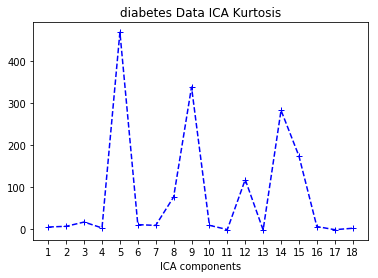

In [11]:
kurt ={}
ica = FastICA(random_state=5, n_components=18) 
X_ica=ica.fit_transform(X)
tmp = ica.fit_transform(X)
tmp = pd.DataFrame(tmp)
tmp = tmp.kurt(axis=0)

plt.plot(range(1,19),tmp,'--b+')
plt.title('diabetes Data ICA Kurtosis')
plt.xticks(range(1,19))
plt.xlabel("ICA components")
ica_sel=np.column_stack((X_ica[:,5].T,X_ica[:,8].T,X_ica[:,9].T,X_ica[:,12].T,X_ica[:,14].T,X_ica[:,15].T))
X_trainICA, X_testICA, Y_trainICA, Y_testICA = train_test_split(ica_sel, Y, stratify=Y, test_size=0.3, random_state=0)

-----------------PCA------------------------
input data features and numbers


(805, 10)

Best parameters set found on development set:
{'random_state': 0, 'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': [50, 2]}

mean training:
[0.7689441]

mean test:
[0.6621118]

mean fit time:
[0.5596833]

Final real Test set score: 0.66


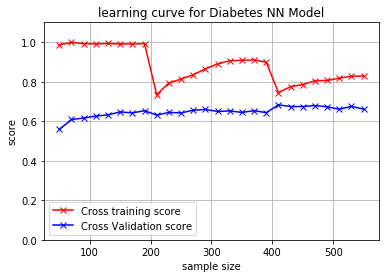

In [13]:
pca = PCA(n_components=10)
pca.fit(X)
X_PCA=pca.transform(X)
X_trainPCA, X_testPCA, Y_trainPCA, Y_testPCA = train_test_split(X_PCA, Y, stratify=Y, test_size=0.3, random_state=0)
print('-----------------PCA------------------------')
result_ICA=NeuronNet(X_trainPCA,Y_trainPCA,X_testPCA,Y_testPCA)

input data features and numbers


(805, 6)

Best parameters set found on development set:
{'random_state': 0, 'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': [50, 2]}

mean training:
[0.72546584]

mean test:
[0.72298137]

mean fit time:
[0.59300079]

Final real Test set score: 0.65


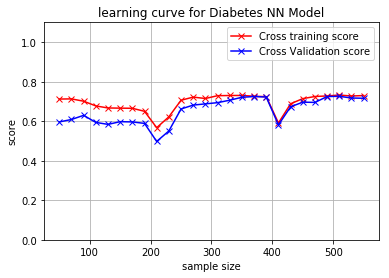

In [12]:
X_trainICA, X_testICA, Y_trainICA, Y_testICA = train_test_split(ica_sel, Y, stratify=Y, test_size=0.3, random_state=0)
result_ICA=NeuronNet(X_trainICA,Y_trainICA,X_testICA,Y_testICA)

-----------------RP------------------------
input data features and numbers


(805, 17)

Best parameters set found on development set:
{'random_state': 0, 'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': [50, 2]}

mean training:
[0.75885093]

mean test:
[0.69503106]

mean fit time:
[0.44071808]

Final real Test set score: 0.69


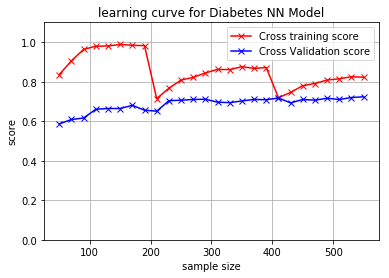

In [17]:
dim=17
rp = SparseRandomProjection(random_state=6, n_components=dim)
X_RP=rp.fit_transform(X)
X_trainRP, X_testRP, Y_trainRP, Y_testRP = train_test_split(X_RP, Y, stratify=Y, test_size=0.3, random_state=0)
print('-----------------RP------------------------')
result_ICA=NeuronNet(X_trainRP,Y_trainRP,X_testRP,Y_testRP)


-----------------FA------------------------
input data features and numbers


(805, 7)

Best parameters set found on development set:
{'random_state': 0, 'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': [50, 2]}

mean training:
[0.75310559]

mean test:
[0.72795031]

mean fit time:
[0.4229614]

Final real Test set score: 0.69


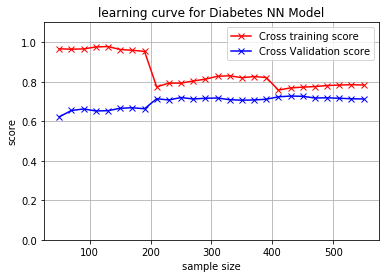

In [18]:
fa=FactorAnalysis(n_components=7, random_state=2)
X_FA=fa.fit_transform(X)
X_trainFA, X_testFA, Y_trainFA, Y_testFA = train_test_split(X_FA, Y, stratify=Y, test_size=0.3, random_state=0)
print('-----------------FA------------------------')
result_ICA=NeuronNet(X_trainFA,Y_trainFA,X_testFA,Y_testFA)


-----------------original------------------------
input data features and numbers


(805, 19)

Best parameters set found on development set:
{'random_state': 0, 'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': [50, 2]}

mean training:
[0.79285714]

mean test:
[0.72049689]

mean fit time:
[0.50436785]

Final real Test set score: 0.70


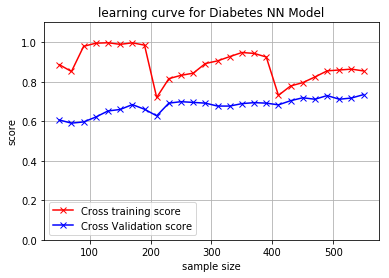

In [19]:
X_trainOrig, X_testOrig, Y_trainOrig, Y_testOrig = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=0)
print('-----------------original------------------------')
result_ICA=NeuronNet(X_trainOrig,Y_trainOrig,X_testOrig,Y_testOrig)

----------------------Orig with cluster label------------------
input data features and numbers


(805, 20)

Best parameters set found on development set:
{'random_state': 0, 'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': [50, 2]}

mean training:
[0.81102484]

mean test:
[0.70124224]

mean fit time:
[0.61217325]

Final real Test set score: 0.68


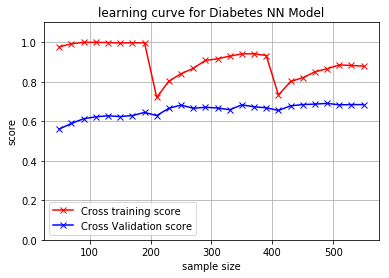

In [24]:
# now with the cluster labels

from sklearn import mixture
print('----------------------Orig with cluster label------------------')
clusterer = KMeans(n_clusters=3,random_state=12,init='k-means++')
clusterer.fit(X)
cluster_labels = clusterer.predict(X)
CX=np.column_stack((X,cluster_labels))
CX_trainOrig, CX_testOrig, CY_trainOrig, CY_testOrig = train_test_split(CX, Y, stratify=Y, test_size=0.3, random_state=0)
result_ICA=NeuronNet(CX_trainOrig,CY_trainOrig,CX_testOrig,CY_testOrig)




----------------------after FA  with cluster label by Kmeans------------------
input data features and numbers


(805, 8)

Best parameters set found on development set:
{'random_state': 0, 'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': [50, 2]}

mean training:
[0.74875776]

mean test:
[0.7173913]

mean fit time:
[0.37818611]

Final real Test set score: 0.68


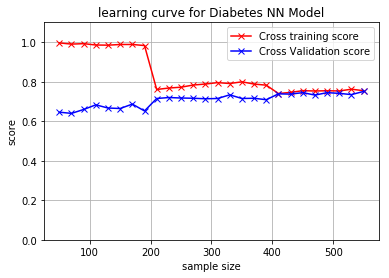

In [25]:

fa=FactorAnalysis(n_components=7, random_state=2)
X_FA=fa.fit_transform(X)
print('----------------------after FA  with cluster label by Kmeans------------------')
clusterer = KMeans(n_clusters=3,random_state=12,init='k-means++')
clusterer.fit(X_FA)
cluster_labels = clusterer.predict(X_FA)
CX=np.column_stack((X_FA,cluster_labels))
CX_trainOrig, CX_testOrig, CY_trainOrig, CY_testOrig = train_test_split(CX, Y, stratify=Y, test_size=0.3, random_state=0)
result_ICA=NeuronNet(CX_trainOrig,CY_trainOrig,CX_testOrig,CY_testOrig)

input data features and numbers


(805, 20)

Best parameters set found on development set:
{'random_state': 0, 'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': [50, 2]}

mean training:
[0.80388199]

mean test:
[0.7136646]

mean fit time:
[0.56826699]

Final real Test set score: 0.67


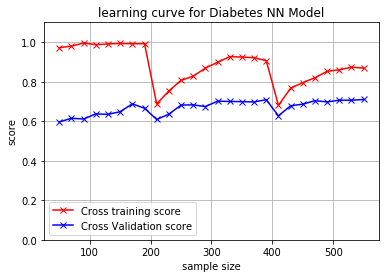

In [26]:
gmm = mixture.GaussianMixture(n_components=11, covariance_type='full',random_state=0)
gmm.fit(X)
cluster_labels = gmm.predict(X)
emCX=np.column_stack((X,cluster_labels))
emCX_trainOrig, emCX_testOrig, emCY_trainOrig, emCY_testOrig = train_test_split(emCX, Y, stratify=Y, test_size=0.3, random_state=0)
result_ICA=NeuronNet(emCX_trainOrig,emCY_trainOrig,emCX_testOrig,emCY_testOrig)

----------------------after FA  with cluster label by Kmeans------------------
input data features and numbers


(805, 8)

Best parameters set found on development set:
{'random_state': 0, 'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': [50, 2]}

mean training:
[0.73804348]

mean test:
[0.70745342]

mean fit time:
[0.31350877]

Final real Test set score: 0.69


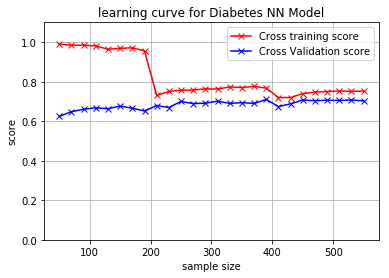

In [27]:

fa=FactorAnalysis(n_components=7, random_state=2)
X_FA=fa.fit_transform(X)
print('----------------------after FA  with cluster label by Kmeans------------------')
gmm = mixture.GaussianMixture(n_components=12, covariance_type='full',random_state=0)
gmm.fit(X_FA)
cluster_labels = gmm.predict(X_FA)
CX=np.column_stack((X_FA,cluster_labels))
CX_trainOrig, CX_testOrig, CY_trainOrig, CY_testOrig = train_test_split(CX, Y, stratify=Y, test_size=0.3, random_state=0)
result_fa=NeuronNet(CX_trainOrig,CY_trainOrig,CX_testOrig,CY_testOrig)

----------------------after ICA  with cluster label by Kmeans------------------
input data features and numbers


(805, 7)

Best parameters set found on development set:
{'random_state': 0, 'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': [50, 2]}

mean training:
[0.60015528]

mean test:
[0.59192547]

mean fit time:
[0.22562439]

Final real Test set score: 0.61


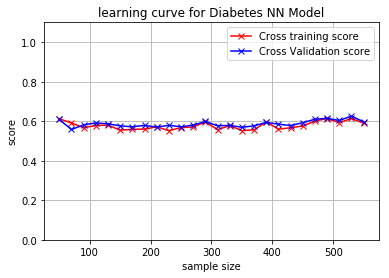

In [29]:
 
print('----------------------after ICA  with cluster label by Kmeans------------------')
gmm = mixture.GaussianMixture(n_components=13, covariance_type='full',random_state=0)
gmm.fit(ica_sel)
cluster_labels = gmm.predict(ica_sel)
CX=np.column_stack((ica_sel,cluster_labels))
CX_trainOrig, CX_testOrig, CY_trainOrig, CY_testOrig = train_test_split(CX, Y, stratify=Y, test_size=0.3, random_state=0)
result_fa=NeuronNet(CX_trainOrig,CY_trainOrig,CX_testOrig,CY_testOrig)

----------------------after ICA  with cluster label by Kmeans------------------
input data features and numbers


(805, 7)

Best parameters set found on development set:
{'random_state': 0, 'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': [50, 2]}

mean training:
[0.60062112]

mean test:
[0.57515528]

mean fit time:
[0.18630271]

Final real Test set score: 0.61


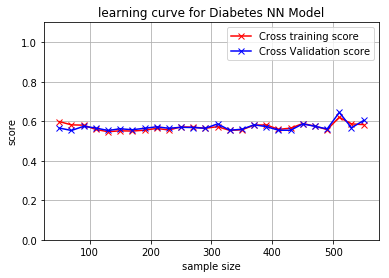

In [30]:
print('----------------------after ICA  with cluster label by Kmeans------------------')
clusterer = KMeans(n_clusters=7,random_state=12,init='k-means++')
clusterer.fit(ica_sel)
cluster_labels = gmm.predict(ica_sel)
CX=np.column_stack((ica_sel,cluster_labels))
CX_trainOrig, CX_testOrig, CY_trainOrig, CY_testOrig = train_test_split(CX, Y, stratify=Y, test_size=0.3, random_state=0)
result_fa=NeuronNet(CX_trainOrig,CY_trainOrig,CX_testOrig,CY_testOrig)